In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
ards = pd.read_csv("/home/watercar99/project/MIMIC-III/ARDS.csv")
df = pd.read_csv("~/project/MIMIC-III/Data/FINAL/New_Demo+Lab/Demo_Lab(50%).csv")

In [32]:
df = df[["SUBJECT_ID", "HADM_ID", "DOA", "y"]]
df

,SUBJECT_ID,HADM_ID,DOA,y
0,101,175533,15 days 18:41:00,1
1,111,192123,NaN,0
2,141,168006,3 days 09:29:00,1
3,148,199488,NaN,0
4,170,175350,NaN,0
...,...,...,...,...
2277,32763,160695,33 days 20:31:00,1
2278,32779,133757,6 days 14:39:00,1
2279,32781,142684,NaN,0
2280,32786,165351,NaN,0


/tmp/ipykernel_3064863/2302043639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day'] = df1['DOA'].str.extract('(\d+)').astype(int)


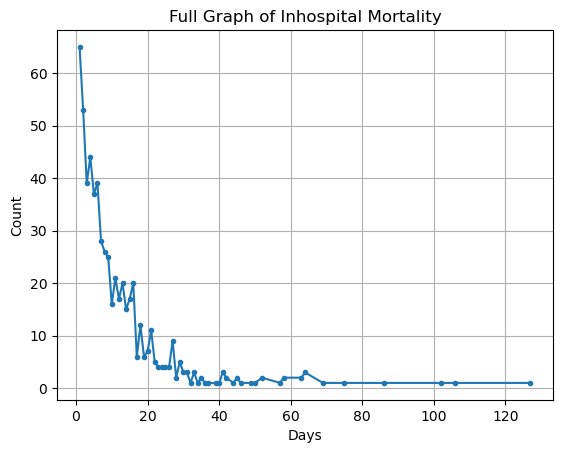

In [38]:
# 'y' 칼럼이 1인 데이터만 선택
df1 = df[df["y"] == 1]

# 'DOA' 칼럼에서 숫자만 추출 (예: '15 days 18:41:00' -> 15)
df1['Day'] = df1['DOA'].str.extract('(\d+)').astype(int)

# 'Days' 칼럼을 기준으로 그룹화하고 그룹별 데이터 개수(count) 계산
day_counts = df1['Day'].value_counts().sort_index()

# x축은 'Days' 값, y축은 해당 값의 데이터 개수로 하는 선 그래프 생성
plt.plot(day_counts.index, day_counts.values, linestyle='-', marker='o', markersize=3)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Full Graph of Inhospital Mortality')
plt.grid(True)
plt.show()


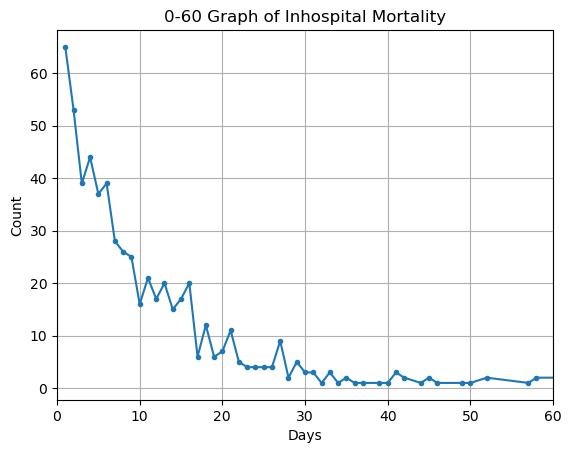

In [39]:
# x축은 'Days' 값, y축은 해당 값의 데이터 개수로 하는 선 그래프 생성
plt.plot(day_counts.index, day_counts.values, linestyle='-', marker='o', markersize=3)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('0-60 Graph of Inhospital Mortality')
plt.grid(True)

# x 축 범위 설정
plt.xlim(0, 60)

plt.show()

In [13]:
data = pd.read_csv("/data/project/noh/project/MIMIC-III/Data/OI&OSI/new_OI&OSI(down).csv")
df1 = pd.merge(df, data[["SUBJECT_ID", "HADM_ID"]], on=['SUBJECT_ID', 'HADM_ID'], how='inner')
df1

,SUBJECT_ID,HADM_ID,DOA,y
0,101,175533,15 days 18:41:00,1
1,111,192123,NaN,0
2,141,168006,3 days 09:29:00,1
3,148,199488,NaN,0
4,170,175350,NaN,0
...,...,...,...,...
2277,32763,160695,33 days 20:31:00,1
2278,32779,133757,6 days 14:39:00,1
2279,32781,142684,NaN,0
2280,32786,165351,NaN,0


In [18]:
# 'DOA' 칼럼에서 'days' 앞에 있는 값을 추출하여 정수로 변환
df1['DOA'] = df1['DOA'].str.extract(r'(\d+) days').astype(float)

# 'y' 칼럼이 1이면서 'DOA' 값이 30 이하인 경우 'new_y'에 1을, 그렇지 않으면 0을 할당
df1['new_y'] = df1.apply(lambda row: 1 if (row['y'] == 1 and row['DOA'] <= 30) else 0, axis=1)

# 필요 없는 칼럼을 제거하고 결과 출력
df1 = df1[['SUBJECT_ID', 'HADM_ID', 'DOA', 'y', 'new_y']]
df1

AttributeError: Can only use .str accessor with string values!

In [15]:
# 'y_x'와 'y_y' 칼럼이 다른 경우만 필터링
different_y = df1[df1['y'] != df1['new_y']]
different_y

# 'DOA' 열을 기준으로 오름차순으로 정렬
sorted_different_y = different_y.sort_values(by='DOA')
sorted_different_y

,SUBJECT_ID,HADM_ID,DOA,y,new_y
2117,29799,165367,31.0,1,0
2272,32686,175596,31.0,1,0
1074,14692,185051,31.0,1,0
1744,24432,198411,32.0,1,0
2277,32763,160695,33.0,1,0
1974,27642,133035,33.0,1,0
1962,27469,126534,33.0,1,0
1923,26979,161348,34.0,1,0
1965,27542,184604,35.0,1,0
1647,23190,172891,35.0,1,0


In [31]:
data = pd.read_csv("/data/project/noh/project/MIMIC-III/Data/OI&OSI/new_OI&OSI(down).csv")
data = data[["SUBJECT_ID", "HADM_ID", "y"]]


,SUBJECT_ID,HADM_ID,y
0,101,175533,1
1,111,192123,0
2,141,168006,1
3,148,199488,0
4,170,175350,0
...,...,...,...
2277,32763,160695,1
2278,32779,133757,1
2279,32781,142684,0
2280,32786,165351,0
